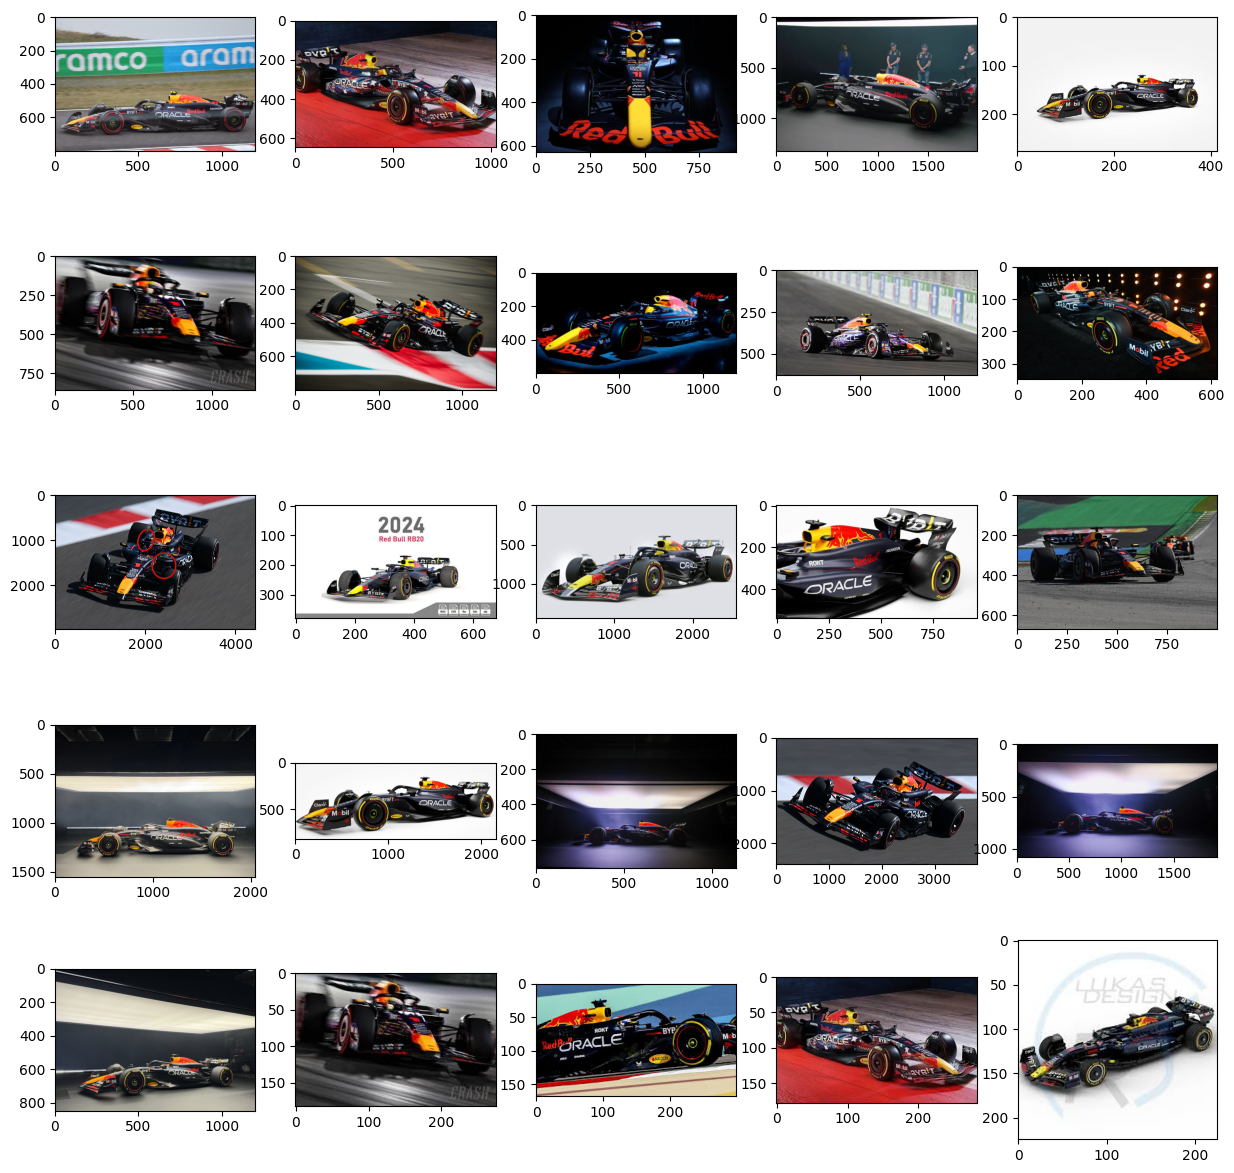

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Crear una figura de tamaño 15x15 pulgadas
plt.figure(figsize=(15,15))

# Leer las imágenes de la carpeta 'data/equipo(ferrari-mercedes-redbull)' 
carpeta = 'data/redbull'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
    plt.subplot(5,5,i+1)
    try:
        imagen = mpimg.imread(carpeta + '/' + nombreimg)
        plt.imshow(imagen)
    except Exception as e:
        print(f"Error al abrir la imagen {nombreimg}: {e}")

Found 140 images belonging to 3 classes.
Found 34 images belonging to 3 classes.


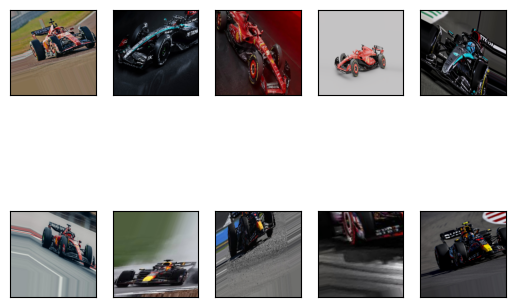

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
# Aumento de datos
#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('data', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('data', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [3]:
data_gen_entrenamiento.class_indices

{'ferrari': 0, 'mercedes': 1, 'redbull': 2}

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
model = Sequential()
# convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(224, 224, 3), activation='relu',))
#pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# flatten
model.add(Flatten())

# Dense
model.add(Dense(128, activation='relu'))

# classifier
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

c:\Users\nikom\miniconda3\envs\machinelearning\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 221, 221, 32)   │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 387200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    49,561,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,563,683 (189.07 MB)

 Trainable params: 49,563,683 (189.07 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Entrenar el modelo usando el generador de imágenes
history = model.fit(data_gen_entrenamiento, validation_data=data_gen_pruebas, epochs=40)

Epoch 1/40


c:\Users\nikom\miniconda3\envs\machinelearning\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 676ms/step - accuracy: 0.2933 - loss: 58.5519 - val_accuracy: 0.3529 - val_loss: 15.3874
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 509ms/step - accuracy: 0.3206 - loss: 12.0865 - val_accuracy: 0.4412 - val_loss: 0.9882
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 532ms/step - accuracy: 0.5927 - loss: 0.9492 - val_accuracy: 0.4706 - val_loss: 1.2460
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 503ms/step - accuracy: 0.5370 - loss: 1.2197 - val_accuracy: 0.4706 - val_loss: 1.3557
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 519ms/step - accuracy: 0.6160 - loss: 0.9749 - val_accuracy: 0.4706 - val_loss: 0.8940
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 504ms/step - accuracy: 0.6669 - loss: 0.8180 - val_accuracy: 0.7353 - val_loss: 0.6669
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 506ms/step - accuracy: 0.7270 - loss: 0.6631 - val_accuracy: 0.5588 - val_loss: 1.4234
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 509ms/step - accuracy: 0.6183 - loss: 0.8064 - val_accuracy: 0.7059 - val_loss: 0.8128


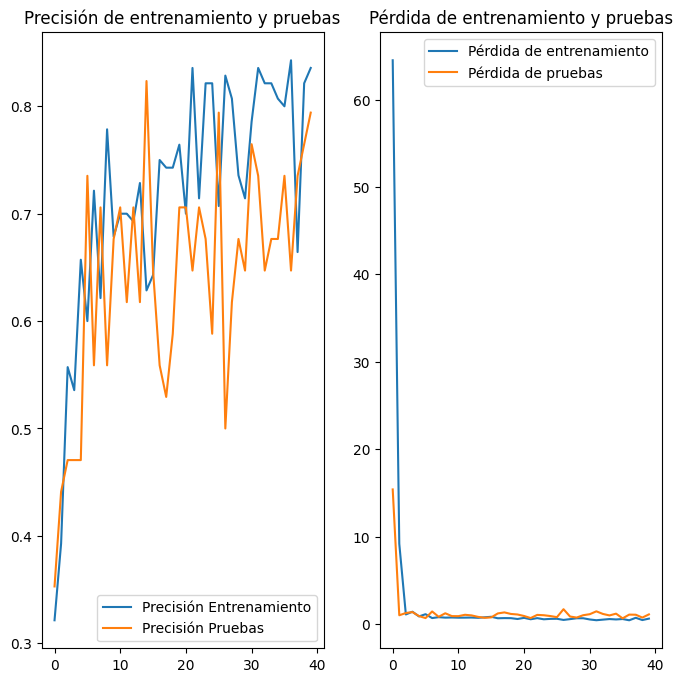

In [7]:
#Graficas de precisión
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

rango_epocas = range(40)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix
import itertools
# Predecir las etiquetas para el conjunto de pruebas
y_pred = model.predict(data_gen_pruebas)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = data_gen_pruebas.classes

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(y_true, y_pred_classes)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step 


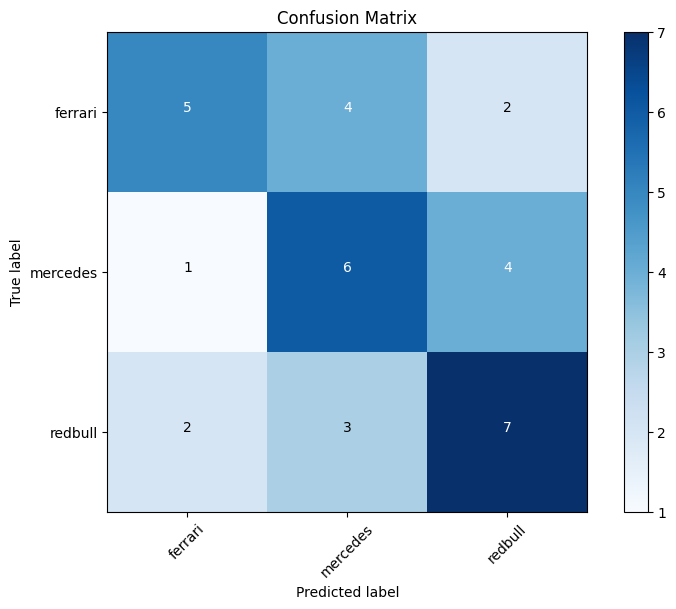

In [9]:
# Función para plotear la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Definir las etiquetas de las clases
class_names = ['ferrari', 'mercedes', 'redbull']

# Plotear la matriz de confusión
plt.figure(figsize=(8, 6))
plot_confusion_matrix(confusion_mtx, classes=class_names, title='Confusion Matrix')
plt.show()

In [10]:
# Guardar el modelo
model.save('modelo_f1.h5')

In [11]:
# Importar modelo guardado
from keras.models import load_model
model = load_model('modelo_f1.h5')

In [12]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy as np

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  imagen = img
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = model.predict(img.reshape(-1, 224, 224, 3))
  prediccion = np.argmax(prediccion[0], axis=-1)
  return imagen, prediccion

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


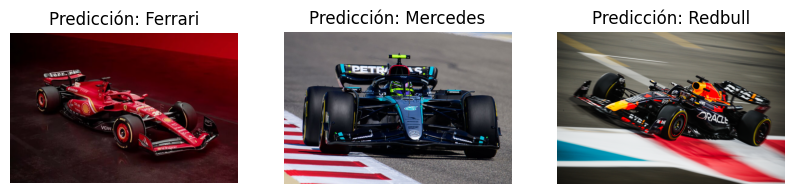

In [13]:
import matplotlib.pyplot as plt
#0 = ferrari, 1 = mercedes, 2 = redbull
url = 'https://www.autohebdo.fr/app/uploads/2024/02/GGNlfTwWUAAqmUh-1-753x494.jpeg' 
url2 = 'https://cdn-6.motorsport.com/images/amp/68yrdg90/s6/lewis-hamilton-mercedes-w15.jpg'

url3 = 'https://sportsbase.io/images/gpfans/copy_1200x800/50afc54627f7fc8e1d8f7afd5d996b19fac2cddb.jpg'
img, prediccion = categorizar (url)#debe ser Ferrari
img2, prediccion2 = categorizar(url2)#debe ser Mercedes
img3, prediccion3 = categorizar(url3)# Debe ser redbull
# Diccionario para mapear la predicción
predicciones = {0: 'Ferrari', 1: 'Mercedes', 2: 'Redbull'}
prediccion = predicciones[prediccion]
prediccion2 = predicciones[prediccion2]
prediccion3 = predicciones[prediccion3]
# Mostrar la imagen
# plt.imshow(img)
# plt.axis('off')
# plt.title(f'Predicción: {prediccion}')
# plt.show()
# Mostrar todas las imágenes con sus predicciones
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

axs[0].imshow(img)
axs[0].axis('off')
axs[0].set_title(f'Predicción: {prediccion}')

axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title(f'Predicción: {prediccion2}')

axs[2].imshow(img3)
axs[2].axis('off')
axs[2].set_title(f'Predicción: {prediccion3}')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


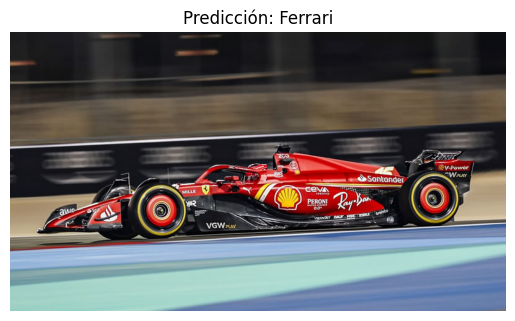

In [14]:
url = 'https://www.f1latam.com/img/prin/fer24010.jpg'

img, prediccion = categorizar(url)
predicciones = {0: 'Ferrari', 1: 'Mercedes', 2: 'Redbull'}
prediccion = predicciones[prediccion]
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicción: {prediccion}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


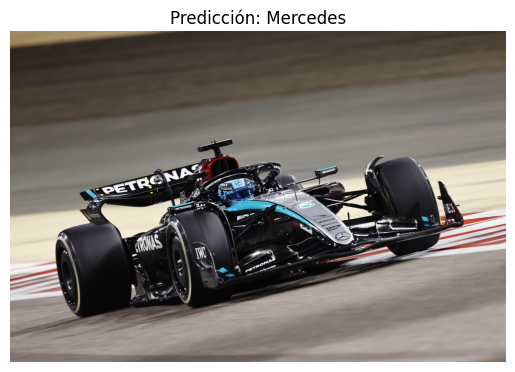

In [15]:
url = 'https://images.ctfassets.net/1fvlg6xqnm65/2fo9cWIajh4i6EvQ6T04FV/e9a19dd04790862c4868d96ec1618177/M417598.jpg?w=3840&q=75&fm=webp'

img, prediccion = categorizar(url)
predicciones = {0: 'Ferrari', 1: 'Mercedes', 2: 'Redbull'}
prediccion = predicciones[prediccion]
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicción: {prediccion}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


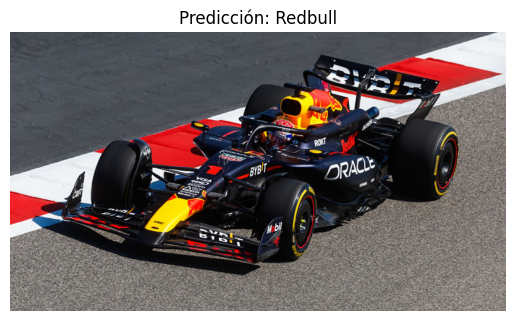

In [16]:
url = 'https://www.f1latam.com/img/prin/rbr24007.jpg'

img, prediccion = categorizar(url)
predicciones = {0: 'Ferrari', 1: 'Mercedes', 2: 'Redbull'}
prediccion = predicciones[prediccion]
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicción: {prediccion}')
plt.show()